In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [3]:
df = pd.read_excel(r'C:\Users\KIIT\OneDrive\Documents\Project n Paper\BrainStroke Prediction\usefile.xlsx')

In [4]:
df.head(10)

,Gender Index,Age,Hypertension,Heart Disease,Martial Status,Work Type Index,Residence Type,Average Glucose Level,BMI,Smoking Status Index,Stroke
0,0,3.0,0,0,0,0,0,95.12,18.0,0,0
1,0,58.0,1,0,1,2,1,87.96,39.2,0,0
2,1,8.0,0,0,0,2,1,110.89,17.6,0,0
3,1,70.0,0,0,1,2,0,69.04,35.9,1,0
4,1,47.0,0,0,1,2,1,210.95,50.1,0,0
5,0,14.0,0,0,0,1,0,161.28,19.1,0,0
6,1,52.0,0,0,1,2,1,77.59,17.7,1,0
7,1,75.0,0,1,1,3,0,243.53,27.0,0,0
8,1,32.0,0,0,1,2,0,77.67,32.3,2,0
9,1,74.0,1,0,1,3,1,205.84,54.6,0,0


In [5]:
df.describe()

,Gender Index,Age,Hypertension,Heart Disease,Martial Status,Work Type Index,Residence Type,Average Glucose Level,BMI,Smoking Status Index,Stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000
mean,0.591866,42.217894,0.093571,0.047512,0.643733,2.119447,0.501290,104.482750,28.574551,0.475046,0.018041
std,0.492009,22.519649,0.291235,0.212733,0.478901,1.102323,0.500004,43.111751,7.639769,0.742823,0.133103
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,10.100000,0.000000,0.000000
25%,0.000000,24.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.540000,23.400000,0.000000,0.000000
50%,1.000000,44.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.580000,27.700000,0.000000,0.000000
75%,1.000000,60.000000,0.000000,0.000000,1.000000,3.000000,1.000000,112.070000,32.600000,1.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,291.050000,97.600000,2.000000,1.000000


In [6]:
df.isnull().sum()

Gender Index             0
Age                      0
Hypertension             0
Heart Disease            0
Martial Status           0
Work Type Index          0
Residence Type           0
Average Glucose Level    0
BMI                      0
Smoking Status Index     0
Stroke                   0
dtype: int64

<AxesSubplot:>

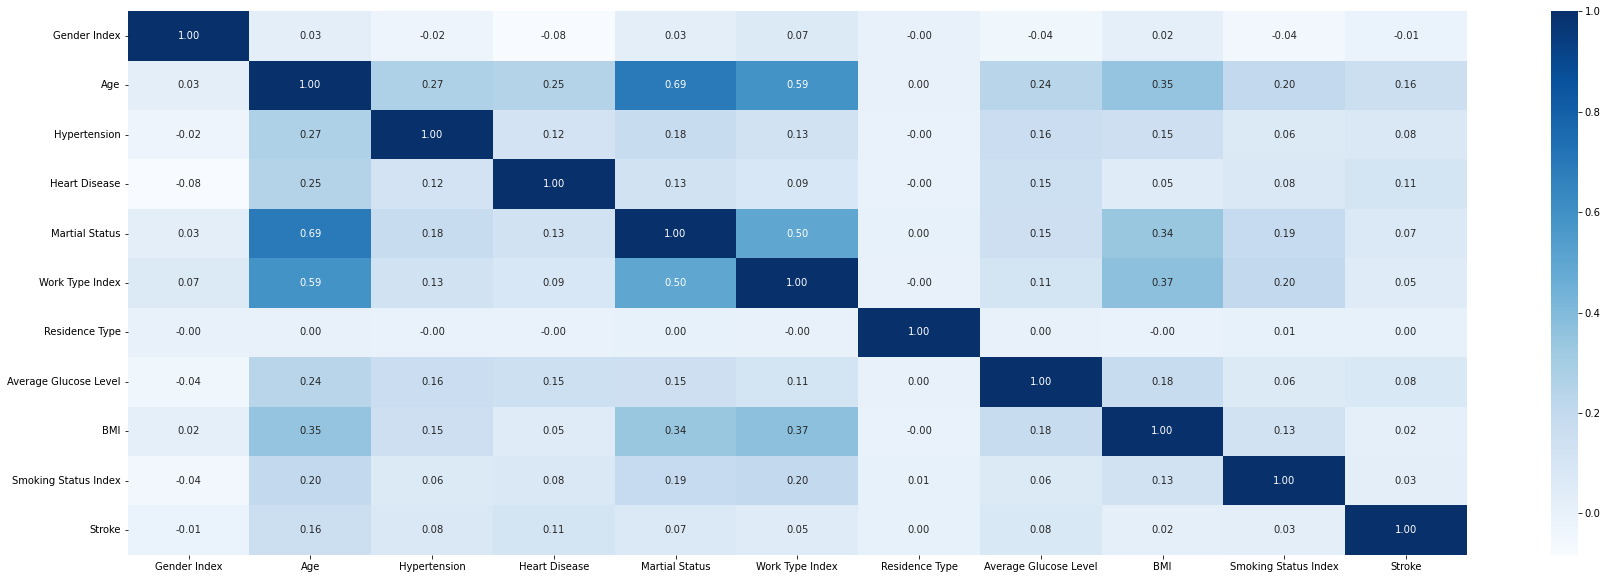

In [7]:
plt.rcParams['figure.figsize'] = (30,10)
sns.heatmap(data=df.corr(),annot=True,fmt='.2f',cmap='Blues')

In [8]:
df.shape

(43400, 11)

In [9]:
df['Stroke'].value_counts()

0    42617
1      783
Name: Stroke, dtype: int64

In [10]:
df.dtypes

Gender Index               int64
Age                      float64
Hypertension               int64
Heart Disease              int64
Martial Status             int64
Work Type Index            int64
Residence Type             int64
Average Glucose Level    float64
BMI                      float64
Smoking Status Index       int64
Stroke                     int64
dtype: object

## Split in Train,Test 

In [11]:
X = df.drop('Stroke',axis=1)
X.head(5)

,Gender Index,Age,Hypertension,Heart Disease,Martial Status,Work Type Index,Residence Type,Average Glucose Level,BMI,Smoking Status Index
0,0,3.0,0,0,0,0,0,95.12,18.0,0
1,0,58.0,1,0,1,2,1,87.96,39.2,0
2,1,8.0,0,0,0,2,1,110.89,17.6,0
3,1,70.0,0,0,1,2,0,69.04,35.9,1
4,1,47.0,0,0,1,2,1,210.95,50.1,0


In [12]:
y = df['Stroke']
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Stroke, dtype: int64

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0, test_size = 0.2)

In [14]:
X_train.shape

(34720, 10)

In [15]:
X_test.shape

(8680, 10)

In [16]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [17]:
X_train_scaled

array([[ 0.82969259,  1.32213599, -0.3222331 , ..., -0.71882026,
        -0.6875417 ,  0.71218423],
       [ 0.82969259, -0.93854822, -0.3222331 , ..., -0.39099967,
        -1.41014335, -0.63806076],
       [-1.20239874,  1.5437717 , -0.3222331 , ..., -0.90813491,
        -0.10946038,  0.71218423],
       ...,
       [ 0.82969259,  1.76540741, -0.3222331 , ..., -1.04803287,
        -0.63498885,  0.71218423],
       [-1.20239874,  0.56857459, -0.3222331 , ..., -0.03255466,
         1.19122259, -0.63806076],
       [ 0.82969259,  1.36646313,  3.10334351, ..., -0.85895022,
         0.56058843,  0.71218423]])

In [18]:
X_test_scaled

array([[ 0.82889999,  1.77139637, -0.3175285 , ..., -0.97004291,
         0.39483603, -0.64540635],
       [-1.20526793,  1.1899273 , -0.3175285 , ..., -0.66408654,
         0.70452884, -0.64540635],
       [ 0.82889999, -0.95703543, -0.3175285 , ..., -0.24640975,
         0.4851631 ,  2.01593669],
       ...,
       [-1.20526793, -0.42029475,  3.14932358, ..., -0.45617529,
         0.4851631 , -0.64540635],
       [-1.20526793, -1.00176382, -0.3175285 , ..., -0.88428241,
        -0.572954  , -0.64540635],
       [-1.20526793,  0.29535949,  3.14932358, ..., -0.57577641,
         1.67231888, -0.64540635]])

## SVM  Modelling 

In [19]:
#SVC : Classifier. (datapoints near to the hyperplane its perpendicular distance is found and summed up for all points 
#and maximised known as Support Vector Classifiers)
#Hyperplane seggregates into classes

In [20]:
#Kernel Function is a method used to take data as input and transform it into the required form of processing data

In [43]:
#C : penalty in error function to optimise results
svm_classifier = svm.SVC(kernel='poly', gamma='auto', C=5)
svm_classifier

SVC(C=5, gamma='auto', kernel='poly')

In [44]:
svm_classifier.fit(X_train_scaled,y_train)

SVC(C=5, gamma='auto', kernel='poly')

In [45]:
y_pred = svm_classifier.predict(X_test_scaled)

In [46]:
y_test

36938    0
25367    0
32252    0
34808    0
15623    0
        ..
38339    0
8543     0
3365     0
17860    0
5890     0
Name: Stroke, Length: 8680, dtype: int64

In [47]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Evaluation 

In [48]:
svm_classifier.score(X_test_scaled,y_test)

0.9846774193548387

In [49]:
svm_classifier.score(X_train_scaled,y_train)

0.981278801843318

## SVM Classifier with kernels {Polynomial, Linear, Rbf} gives Train acc = 98.128 and Test acc = 98.468 
## SVM with kernel {Sigmoid} gives Train acc = 96.60 and Test acc = 96.84 

In [50]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[8547,    0],
       [ 133,    0]], dtype=int64)

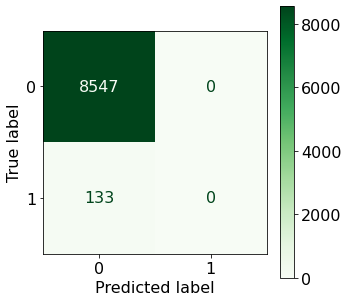

In [51]:
plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams.update({'font.size': 16})
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm_classifier.classes_,)
disp.plot(cmap='Greens')

In [52]:
accuracy_score(y_test,y_pred)

0.9846774193548387

In [53]:
deg = range(2,20)
test_score = []
for x in deg:
    svm_classifier = svm.SVC(kernel='poly', degree=x, gamma='auto', C=5)
    svm_classifier.fit(X_train_scaled,y_train)
    y_pred = svm_classifier.predict(X_test_scaled)
    test_score.append(svm_classifier.score(X_test_scaled,y_test))

In [54]:
test_score = [ 100* round(elem, 4) for elem in test_score ]
print(test_score)

[98.47, 98.47, 98.42999999999999, 98.22999999999999, 98.02, 97.82, 97.78, 97.50999999999999, 97.33000000000001, 97.28999999999999, 97.17, 97.24000000000001, 97.24000000000001, 97.2, 97.11999999999999, 97.17, 97.2, 97.13000000000001]


<AxesSubplot:>

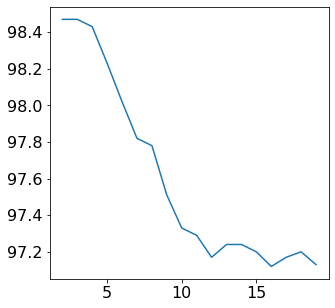

In [55]:
sns.lineplot(x=deg,y=test_score)

In [56]:
svm_classifier1 = svm.SVC(kernel='poly', degree=7, gamma='auto', C=5)
svm_classifier1.fit(X_train_scaled,y_train)
y_pred = svm_classifier1.predict(X_test_scaled)

In [57]:
accuracy_score(y_test,y_pred)

0.978225806451613